In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'house-prices-advanced-regression-techniques:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F5407%2F868283%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240720%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240720T083453Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2d6c22a09a75836c446f5f61778b9070980e11b903a75ddb928abd1c4a8658819fafcf82464fbe13b3a0505682c01594eba49fd0ff790753c5821908d2d2ca4274bee188a2fd3211134b9b63618b3712067ad663462db85b6bfa3ed741cbdde0a5525e5f313e30efcad884f20a483800ed86c1db69775b8a056a04f7931e1541ed802c64ba91fd444b9069f92b32f6d58fb70db27ef5b5aefa5106a534c18d69435bf2bcd79fe894ec521f0aafbb1ed388831cec5c6804be7cf91b96d404d07b28d7fb70e632dd0268129d1e87ddd9addbd553a840b541454cc1747d274971f2aa26d577b9283ea46c5362fd6f9fa9cf0f0e5b8169e93346a56d333d683611e1'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 203809 bytes downloaded
Downloaded and uncompressed: house-prices-advanced-regression-techniques
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import matplotlib.pyplot as plt


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv",index_col ='Id')
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


Data Preprocessing

Dealing with Nan Values

In [4]:
nan_cols = dict()
for j,i in zip(df.columns,np.array(df.isna().sum())):
    if i > 500:
        nan_cols[j] = i
nan_cols

{'Alley': 1369,
 'MasVnrType': 872,
 'FireplaceQu': 690,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

In [5]:
df.drop(list(nan_cols.keys()), axis = 1,inplace = True)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500


In [6]:
df.dtypes['MSZoning']

dtype('O')

In [7]:
nan_rows = dict()
for j,i in zip(df.columns,np.array(df.isna().sum())):
    if i > 0:
        nan_rows[j] = i
nan_rows

{'LotFrontage': 259,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81}

In [8]:
nan_obj_col = df[list(nan_rows.keys())].select_dtypes(include = 'object').columns
nan_obj_col

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [9]:
for col in nan_obj_col:
     df[col] = df[col].fillna(df[col].value_counts().keys()[0])
nan_rows = dict()
for j,i in zip(df.columns,np.array(df.isna().sum())):
    if i > 0:
        nan_rows[j] = i
nan_rows

{'LotFrontage': 259, 'MasVnrArea': 8, 'GarageYrBlt': 81}

In [10]:
for col in nan_rows.keys():
    df[col] = df[col].fillna(df[col].mean())
df.isna().sum().sum()

0

Dealing with duplicates

In [11]:
df.duplicated().sum()

0

Applying Label Encoder

In [12]:
obj_cols = df.select_dtypes(include = 'object').columns
obj_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

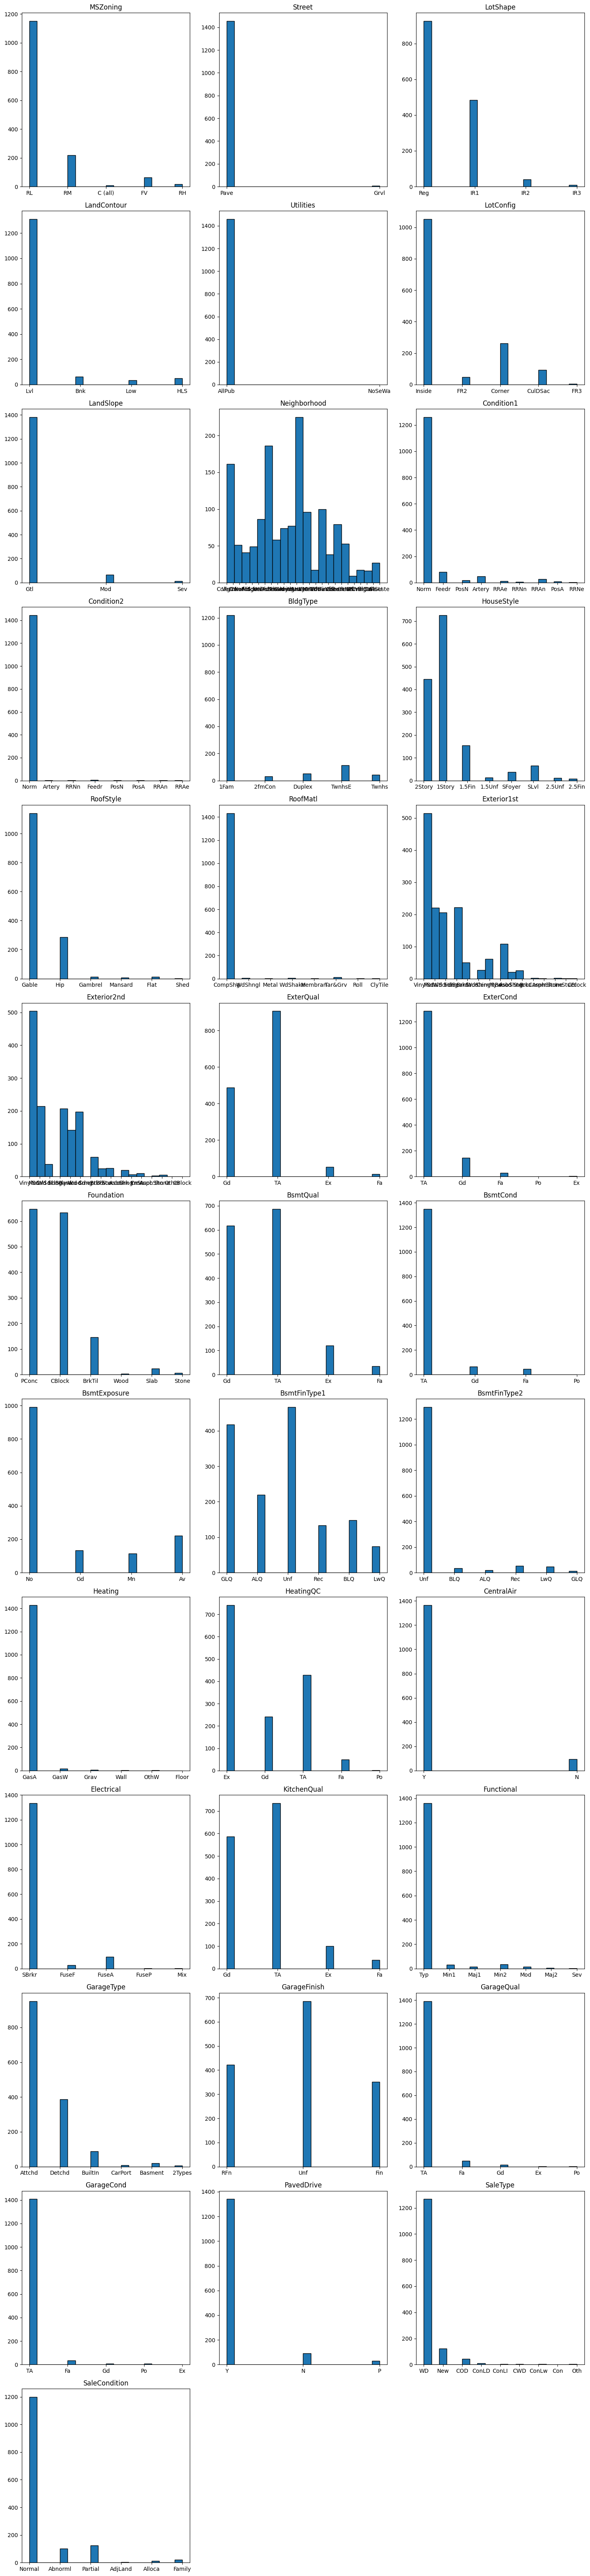

In [13]:
plt.figure(figsize=(15, 5 * 13))
for i,col in enumerate(obj_cols):
    plt.subplot(13,3,i+1)
    plt.hist(df[col],bins = 20, edgecolor = 'black')
    plt.title(col)
plt.tight_layout()
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
les = dict()
for col in obj_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    df[col] += 0.5
    les[col] = le
numerical_col =  []
for col in df.columns:
    if col not in obj_cols:
        numerical_col.append(col)
print(numerical_col)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Data Visualization

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

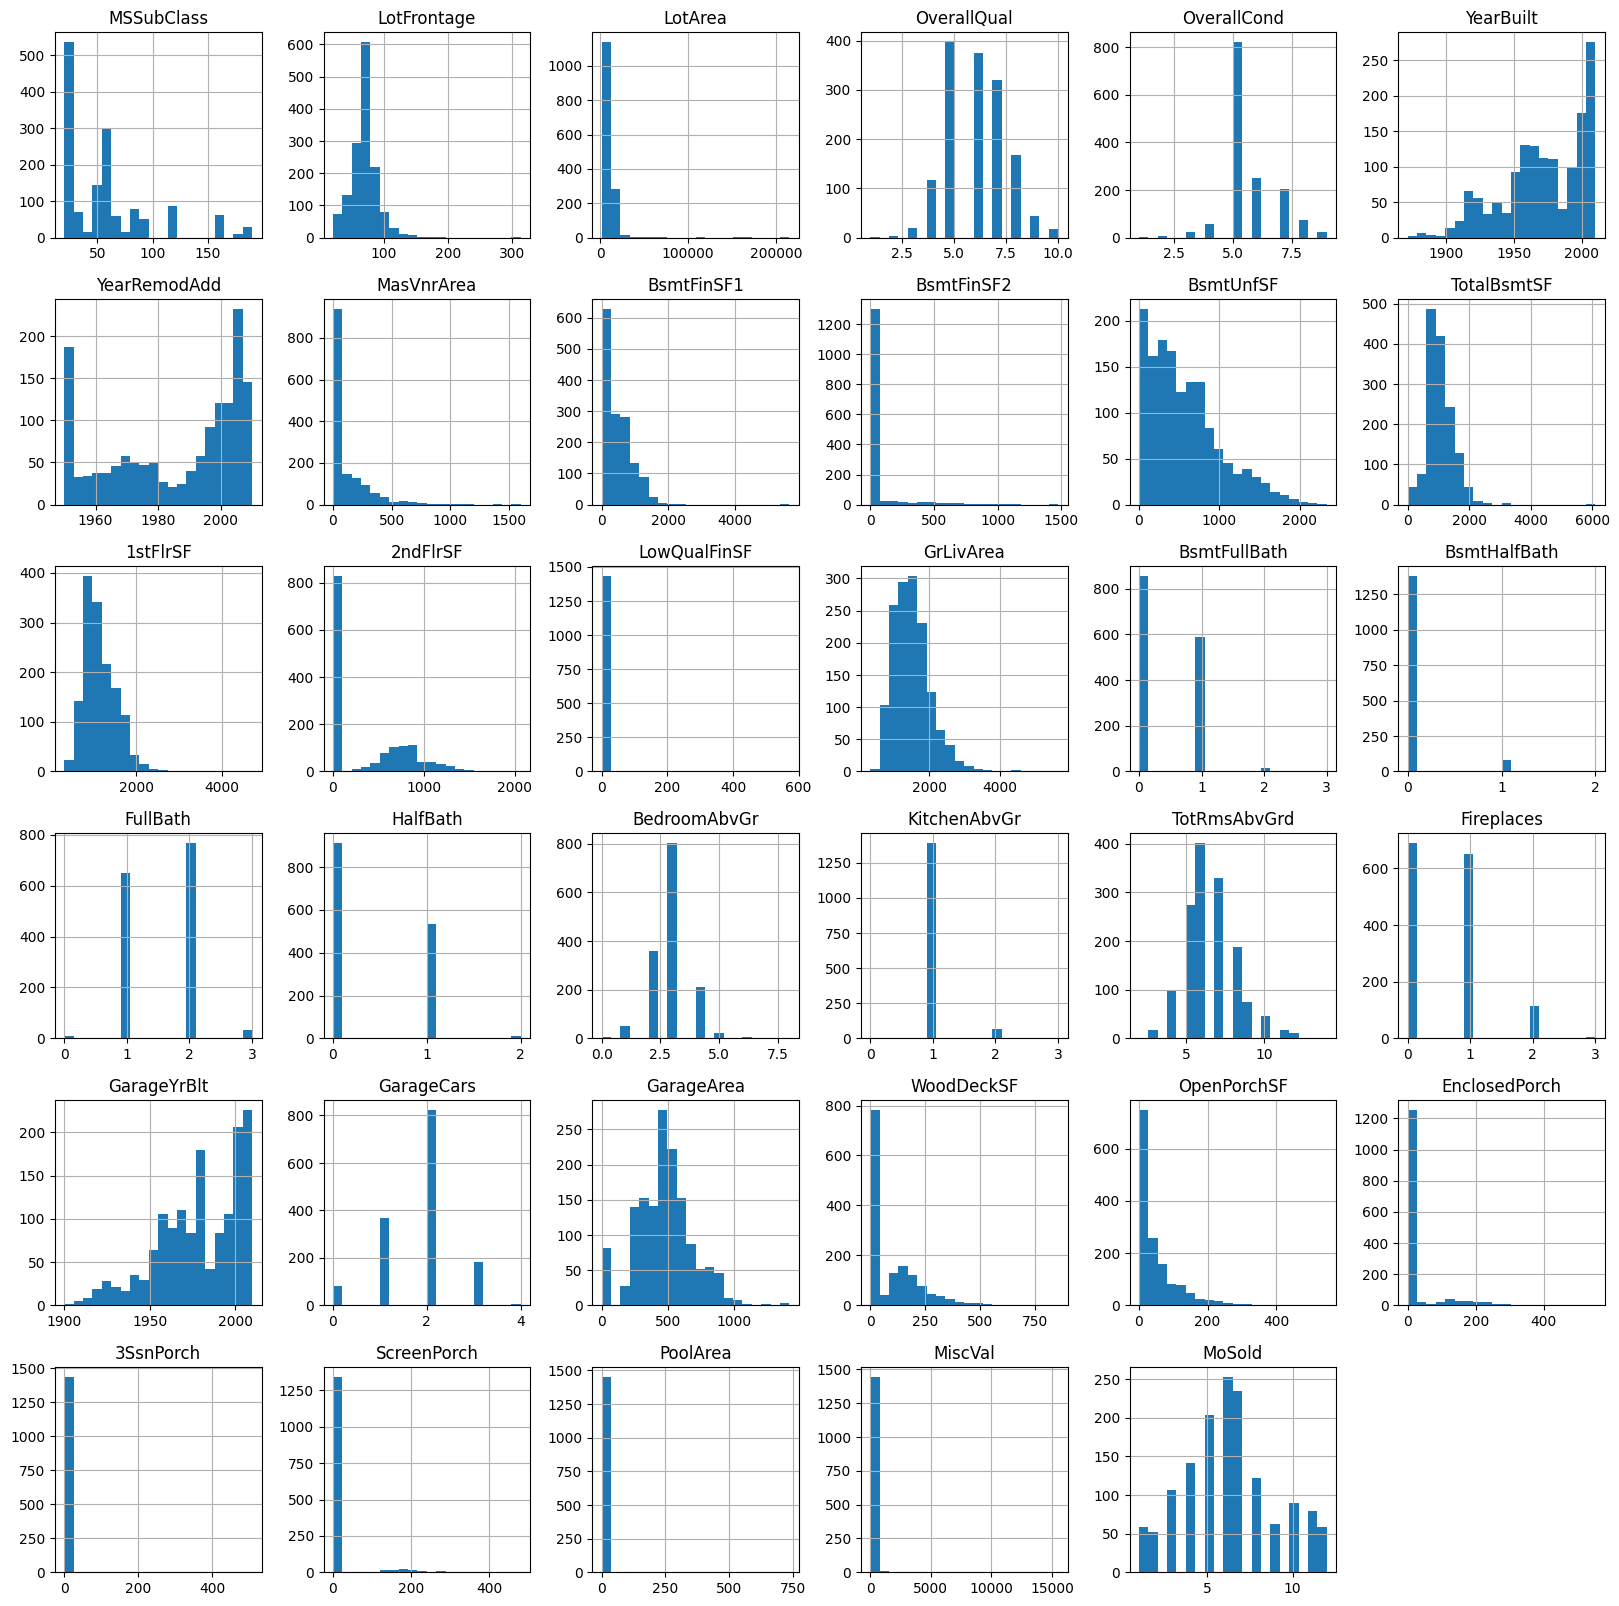

In [17]:
numerical_col = numerical_col[:-1]
df[numerical_col].hist(bins = 20,figsize = (20,20))

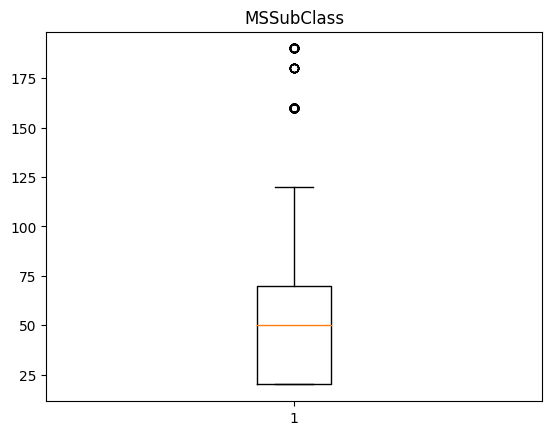

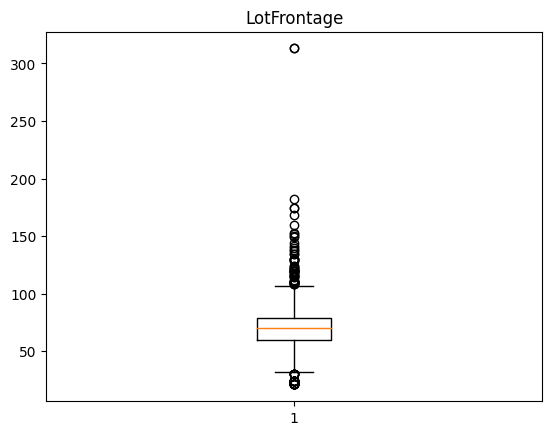

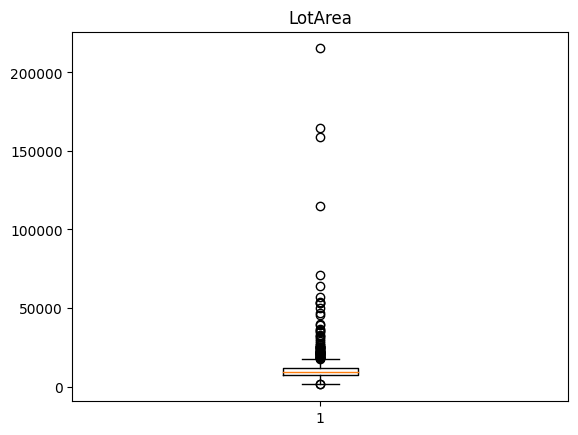

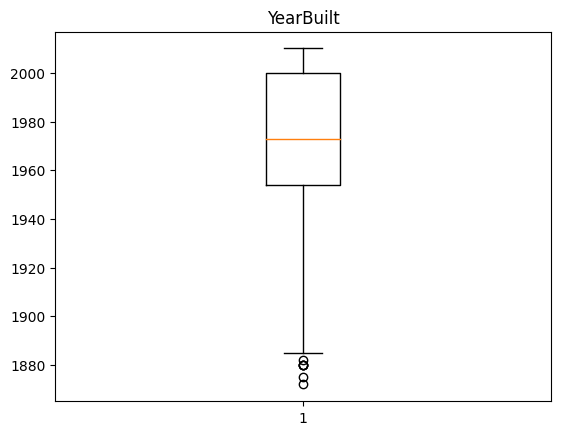

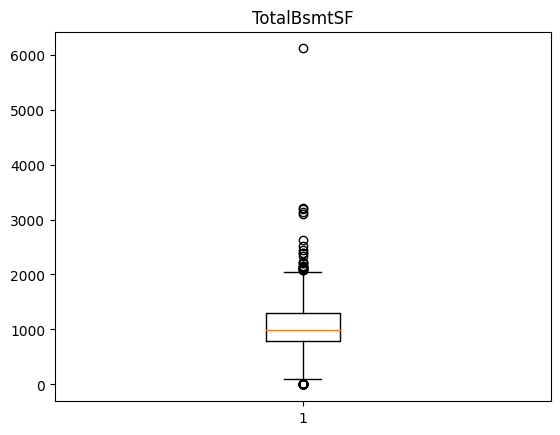

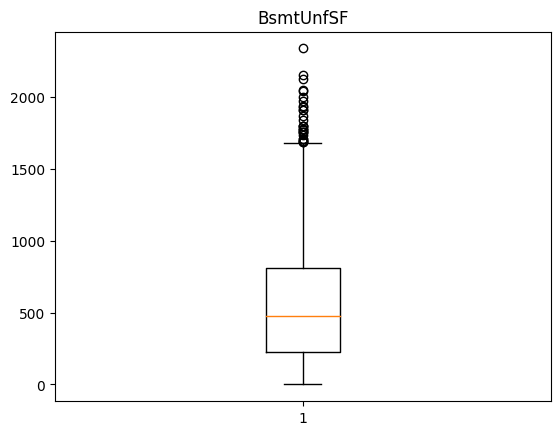

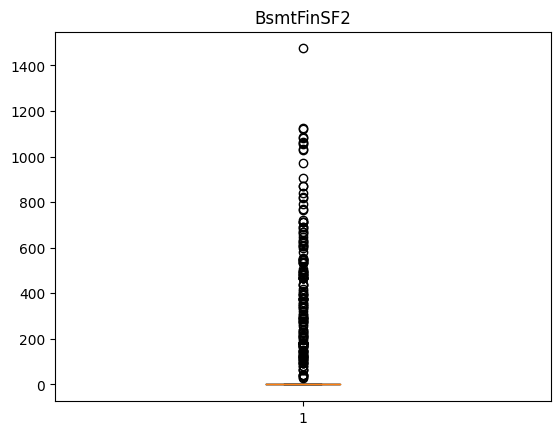

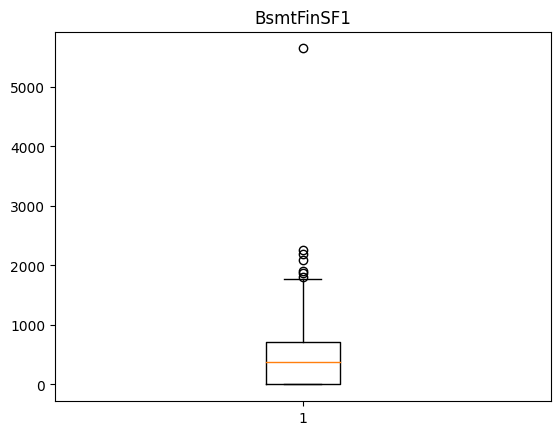

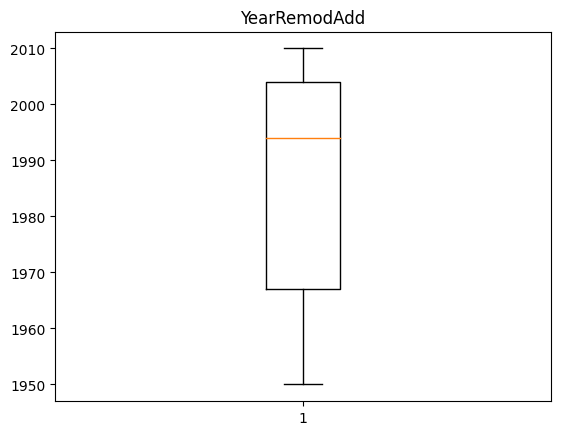

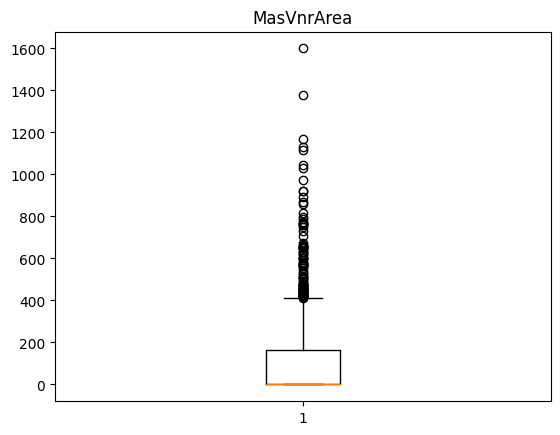

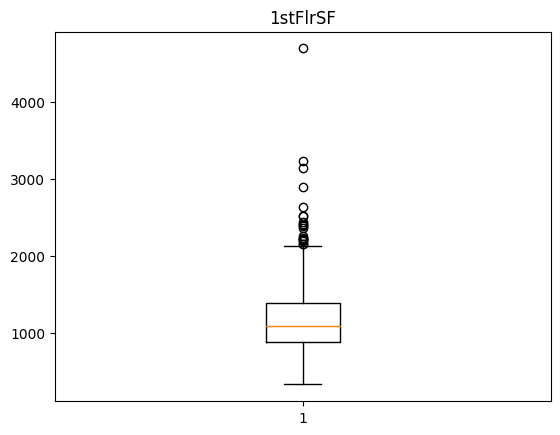

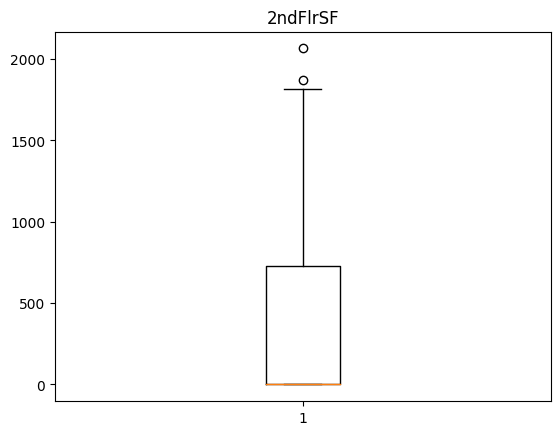

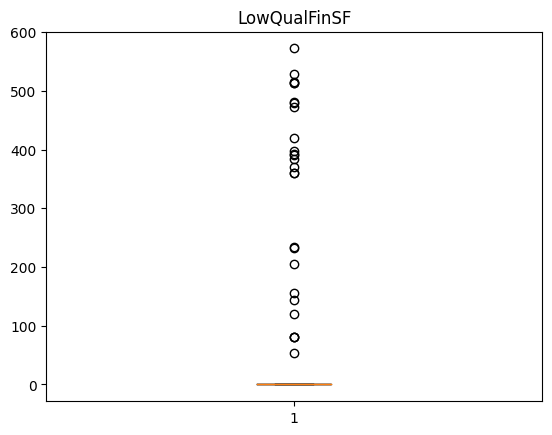

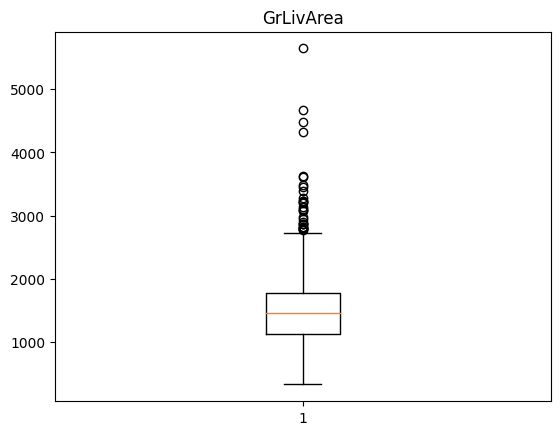

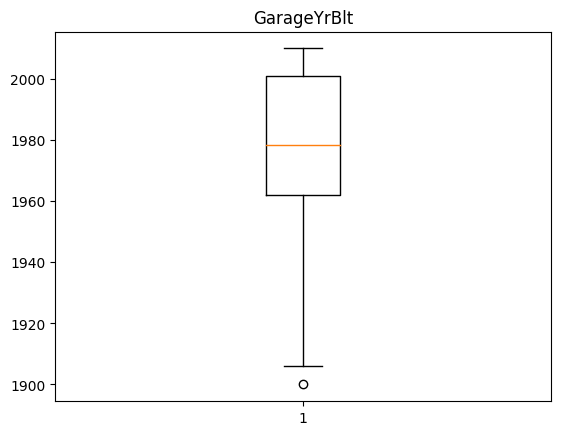

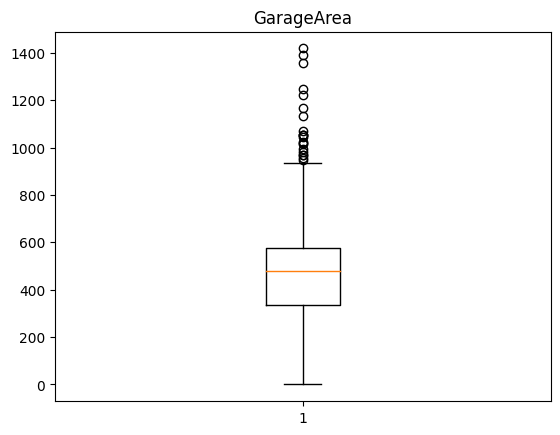

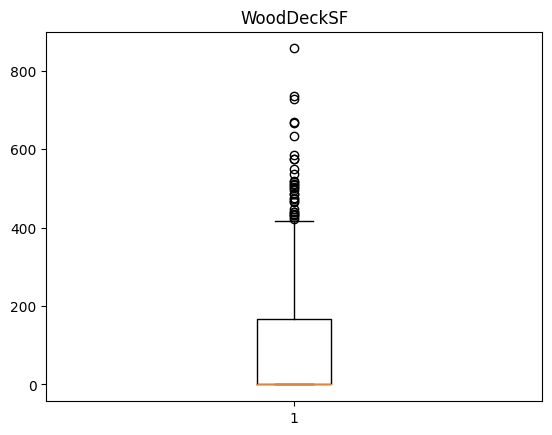

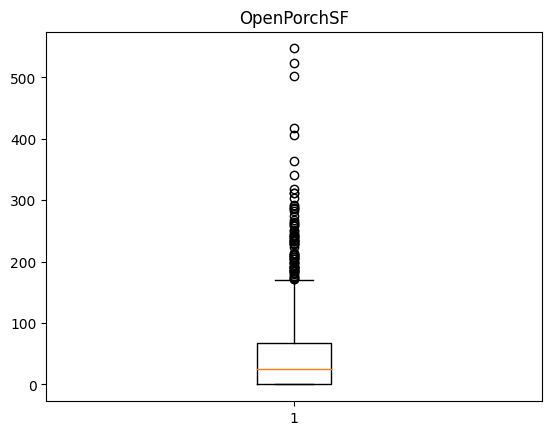

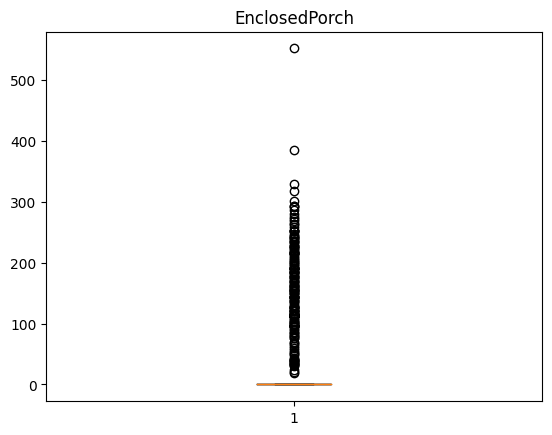

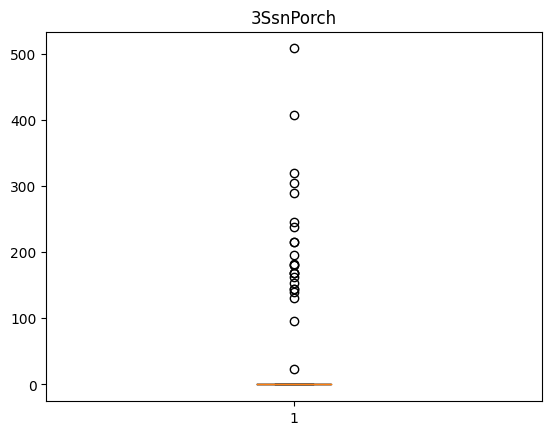

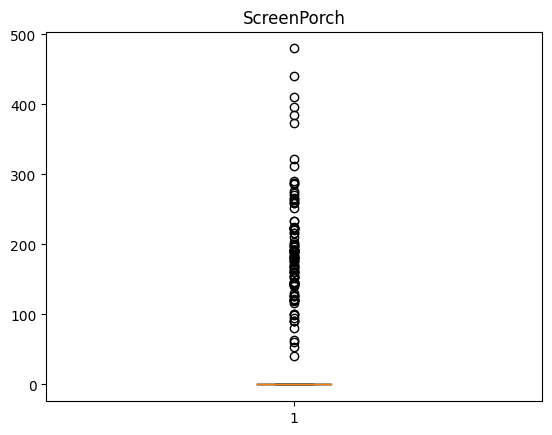

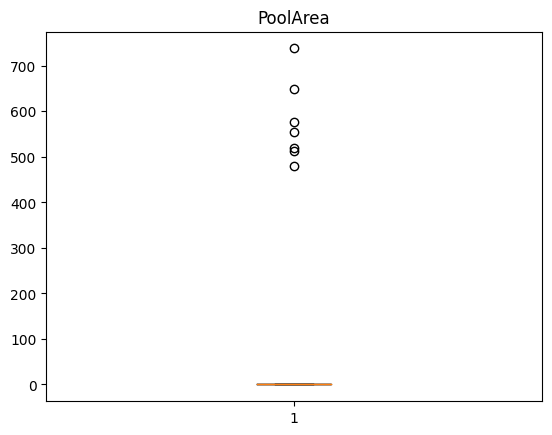

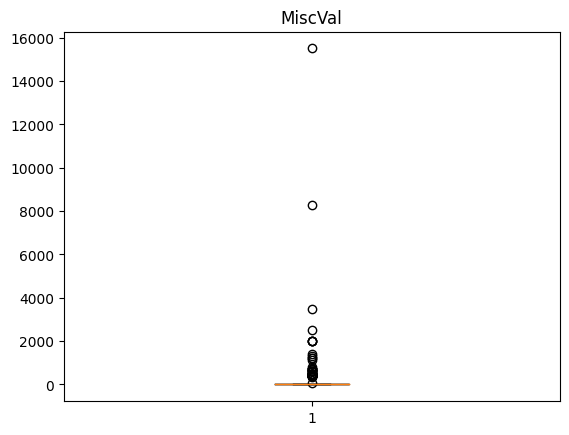

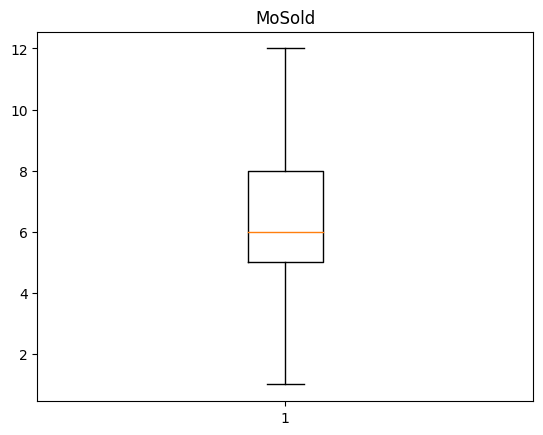

In [19]:
continous_cols = ['MSSubClass','LotFrontage','LotArea','YearBuilt','TotalBsmtSF','BsmtUnfSF',
                  'BsmtFinSF2','BsmtFinSF1','YearRemodAdd','MasVnrArea','1stFlrSF', '2ndFlrSF',
                  'LowQualFinSF','GrLivArea', 'GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF',
                  'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold']
import seaborn as sns

for col in continous_cols:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

Outlier Detection and Removal

In [20]:
outlier_detection_on_col = ['MSSubClass','LotFrontage','LotArea','YearBuilt','TotalBsmtSF','BsmtUnfSF',
                  'BsmtFinSF2','BsmtFinSF1','MasVnrArea','1stFlrSF', '2ndFlrSF',
                  'LowQualFinSF','GrLivArea', 'GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF',
                  'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
means = np.mean(df[outlier_detection_on_col],axis = 0)
threshold = 3
std = np.std(df[outlier_detection_on_col],axis = 0)
z_scores = np.abs((df[outlier_detection_on_col] - means)/ std)
outliers = np.where(z_scores>threshold)[0]
print(len(outliers))

428


In [21]:
df.drop(outliers,axis= 0,inplace = True)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3.5,65.000000,8450,1.5,3.5,3.5,0.5,4.5,0.5,...,0,0,0,0,0,2,2008,8.5,4.5,208500
2,20,3.5,80.000000,9600,1.5,3.5,3.5,0.5,2.5,0.5,...,0,0,0,0,0,5,2007,8.5,4.5,181500
4,70,3.5,60.000000,9550,1.5,0.5,3.5,0.5,0.5,0.5,...,272,0,0,0,0,2,2006,8.5,0.5,140000
6,50,3.5,85.000000,14115,1.5,0.5,3.5,0.5,4.5,0.5,...,0,320,0,0,700,10,2009,8.5,4.5,143000
8,60,3.5,70.049958,10382,1.5,0.5,3.5,0.5,0.5,0.5,...,228,0,0,0,350,11,2009,8.5,4.5,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,180,4.5,35.000000,3675,1.5,3.5,3.5,0.5,4.5,0.5,...,0,0,0,0,0,5,2006,8.5,4.5,145000
1454,20,3.5,90.000000,17217,1.5,3.5,3.5,0.5,4.5,0.5,...,0,0,0,0,0,7,2006,8.5,0.5,84500
1455,20,1.5,62.000000,7500,1.5,3.5,3.5,0.5,4.5,0.5,...,0,0,0,0,0,10,2009,8.5,4.5,185000


Correlation

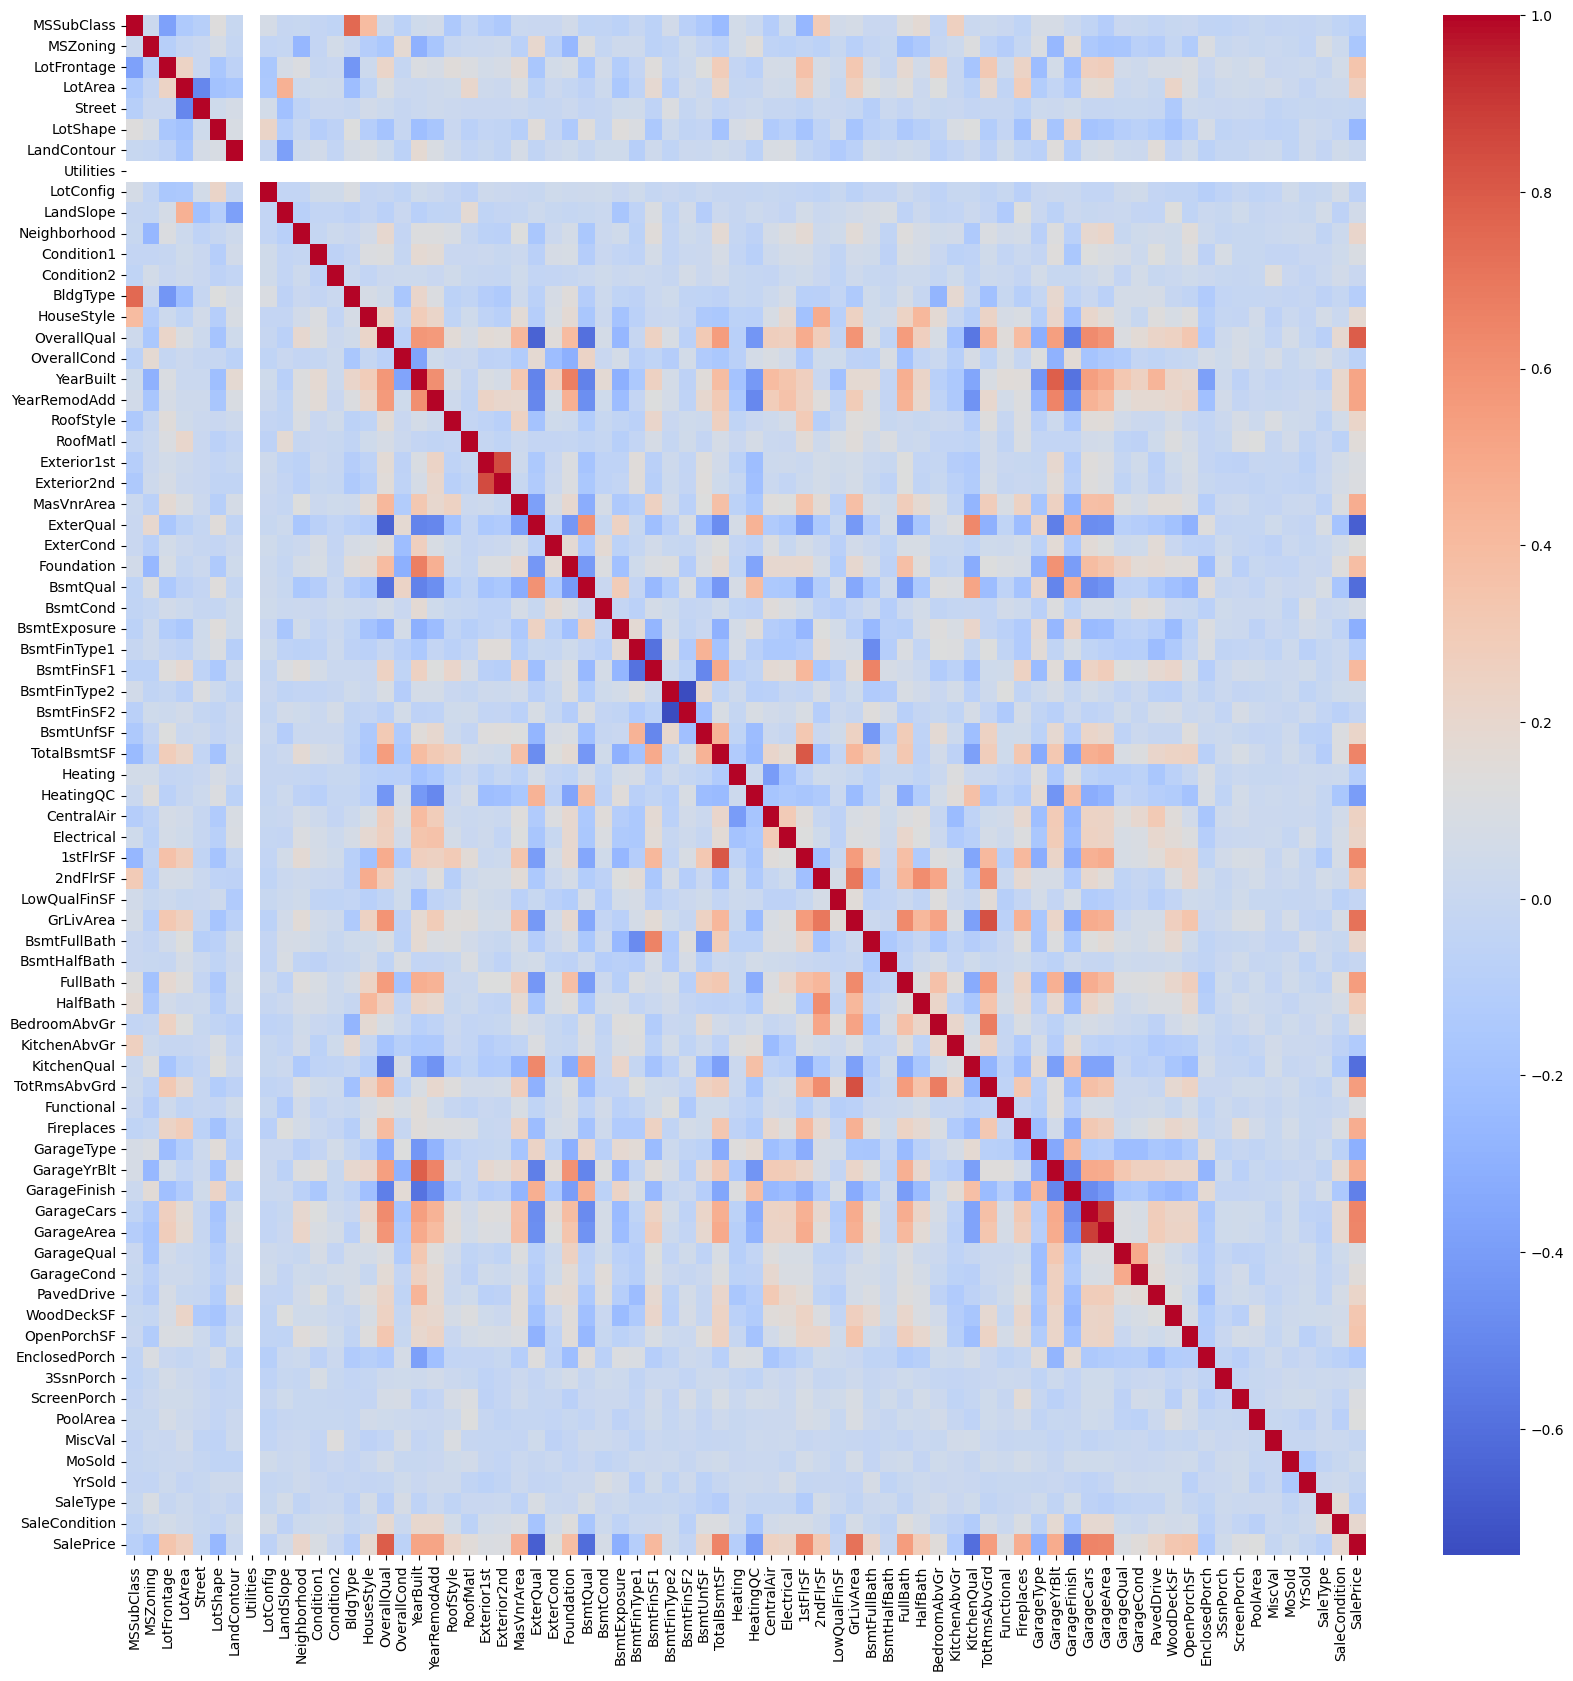

In [22]:
_, ax = plt.subplots(figsize = (20,20))
sns.heatmap(df.corr(),cmap = 'coolwarm',ax=ax)
plt.show()

Mutal Information

In [23]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(df.drop(['SalePrice'],axis = 1),df['SalePrice'],random_state = 42)
dc = dict()
for col, val in zip(df.columns[:-1],mutual_info):
    dc[col] = [val]
dc = pd.DataFrame(dc)
less_mutual_info_col = dc.iloc[:,(mutual_info <= 0.01) & (mutual_info >= -0.01)].columns
less_mutual_info_col

Index(['Street', 'Utilities', 'RoofMatl', 'ExterCond', 'Heating',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageQual',
       '3SsnPorch', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [24]:
df.loc[:,(df.corr()['SalePrice']<= 0.025) & (df.corr()['SalePrice'] >= -0.025)].columns

Index(['Street', 'LandContour', 'Condition2', 'BsmtHalfBath', 'MiscVal',
       'YrSold'],
      dtype='object')

In [25]:
remov_col = ['Street','BsmtHalfBath','MiscVal','YrSold']
df.drop(remov_col,axis = 1,inplace = True)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3.5,65.000000,8450,3.5,3.5,0.5,4.5,0.5,5.5,...,0,61,0,0,0,0,2,8.5,4.5,208500
2,20,3.5,80.000000,9600,3.5,3.5,0.5,2.5,0.5,24.5,...,298,0,0,0,0,0,5,8.5,4.5,181500
4,70,3.5,60.000000,9550,0.5,3.5,0.5,0.5,0.5,6.5,...,0,35,272,0,0,0,2,8.5,0.5,140000
6,50,3.5,85.000000,14115,0.5,3.5,0.5,4.5,0.5,11.5,...,40,30,0,320,0,0,10,8.5,4.5,143000
8,60,3.5,70.049958,10382,0.5,3.5,0.5,0.5,0.5,14.5,...,235,204,228,0,0,0,11,8.5,4.5,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,180,4.5,35.000000,3675,3.5,3.5,0.5,4.5,0.5,7.5,...,0,28,0,0,0,0,5,8.5,4.5,145000
1454,20,3.5,90.000000,17217,3.5,3.5,0.5,4.5,0.5,11.5,...,36,56,0,0,0,0,7,8.5,0.5,84500
1455,20,1.5,62.000000,7500,3.5,3.5,0.5,4.5,0.5,21.5,...,0,113,0,0,0,0,10,8.5,4.5,185000


In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df)
scy = StandardScaler()
scy.fit([df['SalePrice']])

StandardScaler()

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 24)
x = pca.fit_transform(X[:,:-1],X[:,-1])
pca_df = pd.DataFrame(x)
pca_df['SalePrice'] = X[:,-1]
pca_df.corr()['SalePrice']

0            0.865558
1            0.144919
2            0.199855
3            0.009901
4            0.049347
5            0.079300
6           -0.054423
7           -0.108123
8            0.046803
9            0.024678
10           0.026229
11          -0.029657
12          -0.035584
13          -0.040726
14          -0.032184
15           0.020224
16           0.017893
17           0.006417
18           0.025710
19           0.036124
20          -0.016221
21          -0.010692
22          -0.076845
23          -0.011851
SalePrice    1.000000
Name: SalePrice, dtype: float64

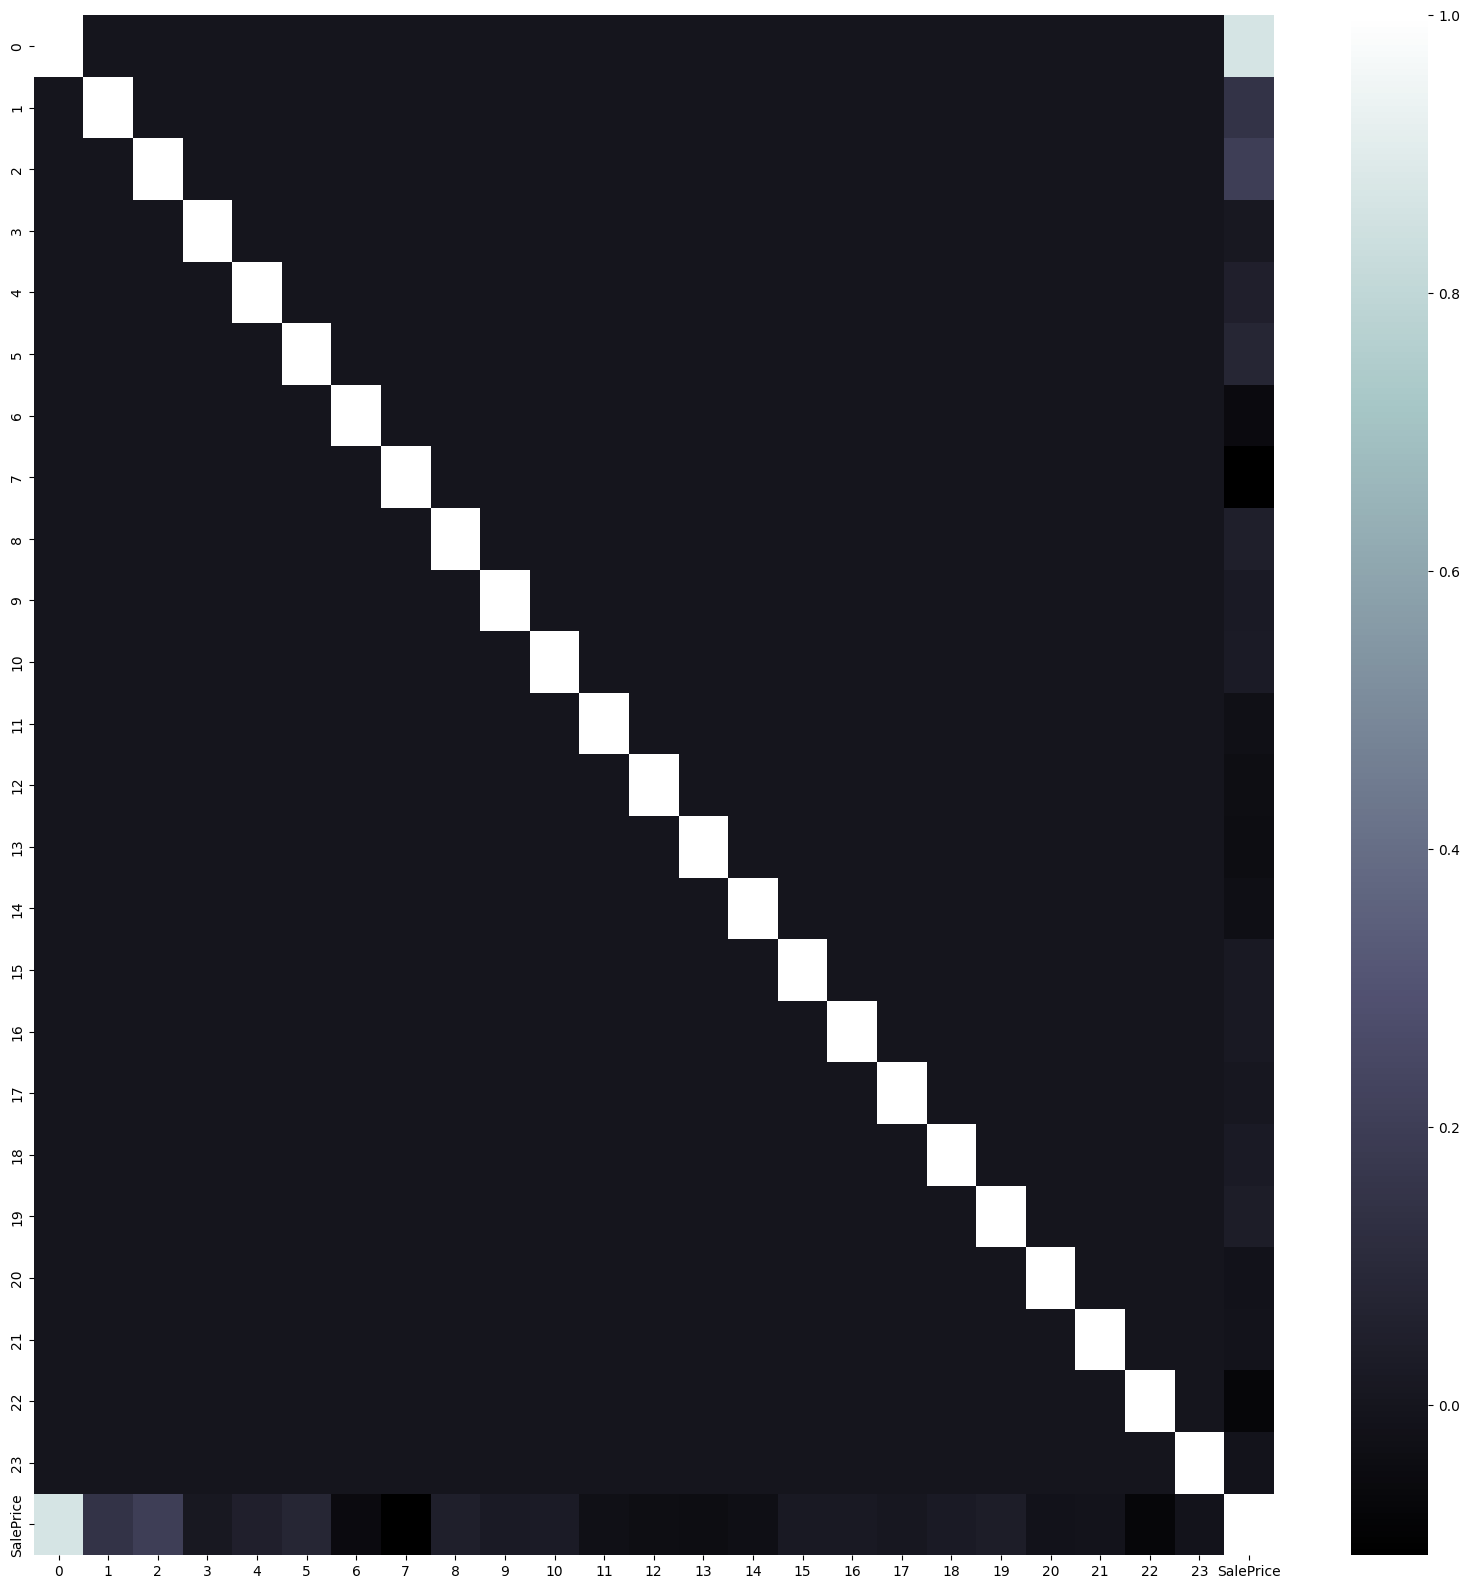

In [28]:
_, ax = plt.subplots(figsize = (20,20))
sns.heatmap(pca_df.corr(),cmap = 'bone',ax=ax)
plt.show()

Splitting

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_df.drop('SalePrice',axis = 1),pca_df['SalePrice'],test_size = 0.2)

Linear Regression

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(X_test)
print("MSE : ", mean_squared_error(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))

MSE :  0.3230583162463834
R2 :  0.7444563238943813


Polymonial Regression

In [32]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_train)

lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression()

In [33]:
y_pred = lin2.predict(poly.transform(X_test))
print("MSE : ", mean_squared_error(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))

MSE :  6.43681187310998
R2 :  -4.09160880786715


Ridge Regression

In [34]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha = 1)
rr.fit(X_train,y_train)

Ridge(alpha=1)

In [35]:
y_pred = rr.predict(X_test)
print("MSE : ", mean_squared_error(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))

MSE :  0.32305386175811285
R2 :  0.7444598474573129


Lasso Regression

In [36]:
from sklearn.linear_model import Lasso

lar = Lasso(alpha = 1)
lar.fit(X_train,y_train)

Lasso(alpha=1)

In [37]:
y_pred = lar.predict(X_test)
print("MSE : ", mean_squared_error(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))

MSE :  0.556092812370464
R2 :  0.5601227568440555


ARD Regression

In [38]:
from sklearn.linear_model import ARDRegression

ardr = ARDRegression()
ardr.fit(X_train,y_train)

ARDRegression()

In [39]:
y_pred = ardr.predict(X_test)
print("MSE : ", mean_squared_error(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))

MSE :  0.32768172112654753
R2 :  0.7407991455467399
